In [1]:
!move "D:DIAMOND\Downloads\독수리\titanic_train.csv"

지정된 파일을 찾을 수 없습니다.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('file-path/data/titanic_train.csv')
df.shape

(916, 13)

# 컬럼 설명
1. pclass : 티켓 등급

2. survived : 생존 유무(생존=1, 죽음=0)

3. name : 승객 이름

4. sex : 성별

5. age : 나이

6. sibsp : 동승자 수(형제 또는 배우자)

7. parch : 동승자 수(부모 또는 자녀)

8. ticket : 티켓 번호

9. far : 티켓 요금

10. cabin : 선실 번호

11. embarked : 탑승 장소(선착장)

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [5]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          175
sibsp          0
parch          0
ticket         0
fare           0
cabin        702
embarked       2
body         831
home.dest    389
dtype: int64

In [6]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'body', 'home.dest'],
      dtype='object')

In [7]:
df1 = df.drop(columns=['cabin','body','home.dest'])
df1.shape

(916, 10)

In [8]:
age_mean = int(df1['age'].mean())

In [9]:
df1['age'] = df1['age'].replace(np.nan,age_mean)

In [10]:
df1['embarked'].value_counts()

S    652
C    179
Q     83
Name: embarked, dtype: int64

In [11]:
df1['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df1['embarked'] = df1['embarked'].replace(np.nan,'S')

In [13]:
df1.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [14]:
df1

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.00,0,1,250644,19.5000,S
1,2,1,"Wells, Miss. Joan",female,4.00,1,1,29103,23.0000,S
2,2,1,"Duran y More, Miss. Florentina",female,30.00,1,0,SC/PARIS 2148,13.8583,C
3,3,0,"Scanlan, Mr. James",male,30.00,0,0,36209,7.7250,Q
4,3,1,"Bradley, Miss. Bridget Delia",female,22.00,0,0,334914,7.7250,Q
...,...,...,...,...,...,...,...,...,...,...
911,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,S
912,3,0,"Guest, Mr. Robert",male,30.00,0,0,376563,8.0500,S
913,3,1,"Smyth, Miss. Julia",female,30.00,0,0,335432,7.7333,Q
914,2,1,"Sincock, Miss. Maude",female,20.00,0,0,C.A. 33112,36.7500,S


In [15]:
def bar(feature):
    survived = df1[df1['survived']==1][feature].value_counts()
    deaded = df1[df1['survived']==0][feature].value_counts()
    df_survived = pd.DataFrame([survived,deaded])
    df_survived.index=['survived','dead']
    return df_survived.plot.bar(stacked=True)

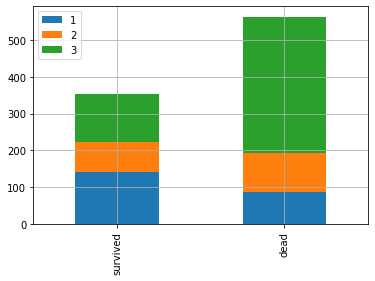

In [16]:
plt.rcParams['axes.grid']=True
bar('pclass')

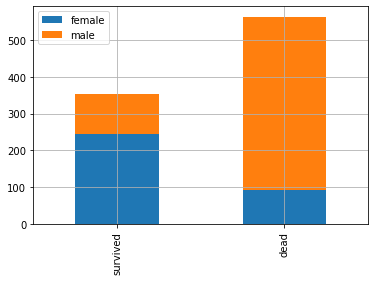

In [17]:
bar('sex')

In [18]:
df1['age'].describe()

count    916.000000
mean      30.187227
std       12.531413
min        0.170000
25%       23.000000
50%       30.000000
75%       35.000000
max       74.000000
Name: age, dtype: float64

In [25]:
df1.loc[df1['age']<10,'age']=0
df1.loc[(df1['age']>=10) & (df1['age']<20) ,'age']=10
df1.loc[(df1['age']>=20) & (df1['age']<30) ,'age']=20
df1.loc[(df1['age']>=30) & (df1['age']<40) ,'age']=30
df1.loc[(df1['age']>=40) & (df1['age']<50) ,'age']=40
df1.loc[(df1['age']>=50) & (df1['age']<60) ,'age']=50
df1.loc[(df1['age']>=60) & (df1['age']<70) ,'age']=60
df1.loc[(df1['age']>=70) & (df1['age']<80) ,'age']=70

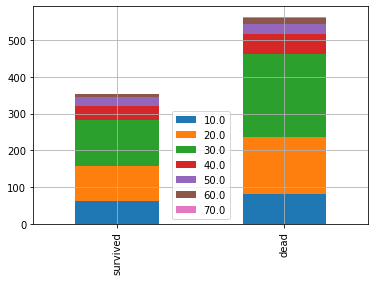

In [27]:
bar('age')

In [33]:
df1.loc[df1['embarked'] =='S','embarked'] = 1
df1.loc[df1['embarked'] =='C','embarked'] = 2
df1.loc[df1['embarked'] =='Q','embarked'] = 3

In [38]:
df1.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked'],
      dtype='object')

In [43]:
df1['family'] = df1['sibsp'] + df1['parch']
df1 = df1.drop(columns=['sibsp','parch'])

In [45]:
df1corr = df1.corr()

In [46]:
df1corr

,pclass,survived,age,fare,family
pclass,1.000000,-0.309735,-0.335853,-0.581359,0.060302
survived,-0.309735,1.000000,-0.018562,0.241467,-0.016433
age,-0.335853,-0.018562,1.000000,0.165130,-0.122426
fare,-0.581359,0.241467,0.165130,1.000000,0.250437
family,0.060302,-0.016433,-0.122426,0.250437,1.000000


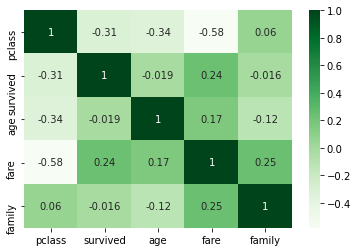

In [49]:
sns.heatmap(df1corr,
           annot=True,
           cmap="Greens")